Importing libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import joblib

Input function

In [ ]:
x=[0,2,4,6]
y=[0,1,0,1]

Perceptron

In [ ]:
class Perceptron: 
    def activationFun(self,x):
        w=self.weights[0]
        w+=np.dot(self.weights[1:],x)
        return (math.sin(w))  
    def fit(self,x,y,lr,epo):
        self.weights=np.zeros(len(x.columns)+1)
        for e in range(epo):
            for r in range(len(x)):
                x1=x.iloc[r]
                predicted=self.activationFun(x1)
                yy=int(y.iloc[r])
                if(yy!=predicted) :
                    error=y.iloc[r]-predicted
                    self.weights[0]=self.weights[0]+lr*error
                    for i in range(len(x1)):
                        self.weights[i+1]=self.weights[i+1]+lr*error*x1[i]      
    def weights(self):
      return self.weights
    def predict(self,xtest):
        predicted=[]
        for i in range(len(xtest)):
            predicted.append(self.activationFun(xtest.iloc[i]))
        p=np.array(predicted)
        for i in range(len(p)):
          if p[i]>0:
            p[i]=1
          else:
            p[i]=0
        return p
    def findAccuracy(self,predicted,y):
        correct=0
        for i in range(len(predicted)):
            if(predicted[i]==int(y.iloc[i])):
                correct+=1
        return (correct/len(predicted))

Grid Search to find parameteres

Accuracy:  0.5714285714285714  Learning rate :  0.5  Epochs :  10 Weights:  [ 8.49744518 38.76228521]
Accuracy:  0.42857142857142855  Learning rate :  0.2  Epochs :  10 Weights:  [ 1.99665761 14.76759763]
Accuracy:  0.5714285714285714  Learning rate :  0.1  Epochs :  10 Weights:  [1.23194719 7.00969916]
Accuracy:  1.0  Learning rate :  0.6  Epochs :  10 Weights:  [13.4719284  57.93935051]
Accuracy:  0.5714285714285714  Learning rate :  0.5  Epochs :  20 Weights:  [15.91337903 70.17377275]
Accuracy:  0.42857142857142855  Learning rate :  0.2  Epochs :  20 Weights:  [ 6.80610873 34.24991756]
Accuracy:  0.5714285714285714  Learning rate :  0.1  Epochs :  20 Weights:  [ 1.62886745 10.48644763]
Accuracy:  0.42857142857142855  Learning rate :  0.6  Epochs :  20 Weights:  [ 26.66990696 117.70275939]
Accuracy:  0.5714285714285714  Learning rate :  0.5  Epochs :  30 Weights:  [ 23.39725872 105.6796088 ]
Accuracy:  0.42857142857142855  Learning rate :  0.2  Epochs :  30 Weights:  [ 7.96229197 44

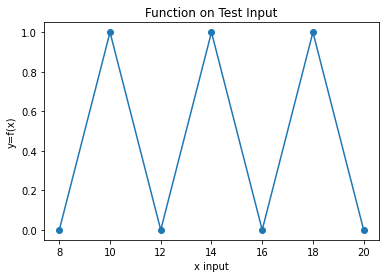

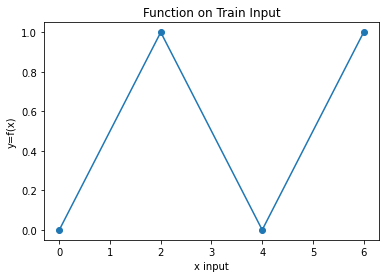

In [ ]:
p=Perceptron()
xtrain=x
x_test=[8,10,12,14,16,18,20]
ytrain=y
ytest=[0,1,0,1,0,1,0]
x_train1=pd.DataFrame(xtrain)
x_test1=pd.DataFrame(x_test)
y_train1=pd.DataFrame(ytrain)
y_test1=pd.DataFrame(ytest)
epo=[10,20,30,40]
lr=[0.5,0.2,0.1,0.6]
for i in range(4):
  for j in range(4):
    p.fit(x_train1,y_train1,lr[j],epo[i])
    pred=p.predict(x_test1)
    print("Accuracy: ",p.findAccuracy(pred,y_test1)," Learning rate : ",lr[j]," Epochs : ",epo[i], "Weights: ",p.weights)
p.fit(x_train1,y_train1,0.2,40)
pred=p.predict(x_test1)
plt.plot(x_test,pred,marker='o')
plt.title("Function on Test Input")
plt.xlabel("x input")
plt.ylabel("y=f(x)")
plt.show()
p.fit(x_train1,y_train1,0.2,40)
pred=p.predict(x_train1)
plt.plot(xtrain,pred,marker='o')
plt.title("Function on Train Input")
plt.xlabel("x input")
plt.ylabel("y=f(x)")
plt.show()

Saving model

In [ ]:
joblib.dump(p, '/content/drive/MyDrive/DL/Assignment-1/Q3_Model')
p = joblib.load('/content/drive/MyDrive/DL/Assignment-1/Q3_Model')